# INTRO

In [1]:
%matplotlib inline

# ML TASKS

![](./img/ai_ml_dl_rl.png)

## ML PROJECT WORKFLOW
With Scikit Learn

![](./img/proj_workflow_sklearn_mapping.png)

---

## Datasets
scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the diabetes dataset for regression.

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn import datasets
iris = datasets.load_iris() # https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset
# diabetes = datasets.load_diabetes()

### Utilizziamo IRIS Dataset [wiki](https://it.wikipedia.org/wiki/Dataset_Iris)
Il dataset Iris è un dataset multivariato introdotto da Ronald Fisher nel 1936. 
Consiste in 150 istanze di Iris misurate da Edgar Anderson e classificate secondo tre specie: 
- Iris setosa
- Iris virginica
- Iris versicolor

Le quattro variabili considerate sono:
- la lunghezza del sepalo
- la larghezza del sepalo
- la lunghezza del petalo
- la larghezza del petalo



creo DataFrame con il mio dataset IRIS

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


aggiungo la variabile target (numerica) al DataFrame

In [5]:
iris_df["target_num"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


aggiungo la variabile target (categorica) al DataFrame

In [6]:
iris_df["target_class"] = iris_df["target_num"].apply(lambda x: iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_num,target_class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


aggiungo una ulteriore variabile target binaria (per distinguere fra class = setosa o altro)

In [7]:
iris_df["target_is_setosa"] = (iris_df["target_class"] == "setosa").astype(int)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_num,target_class,target_is_setosa
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


In [8]:
import seaborn as sns

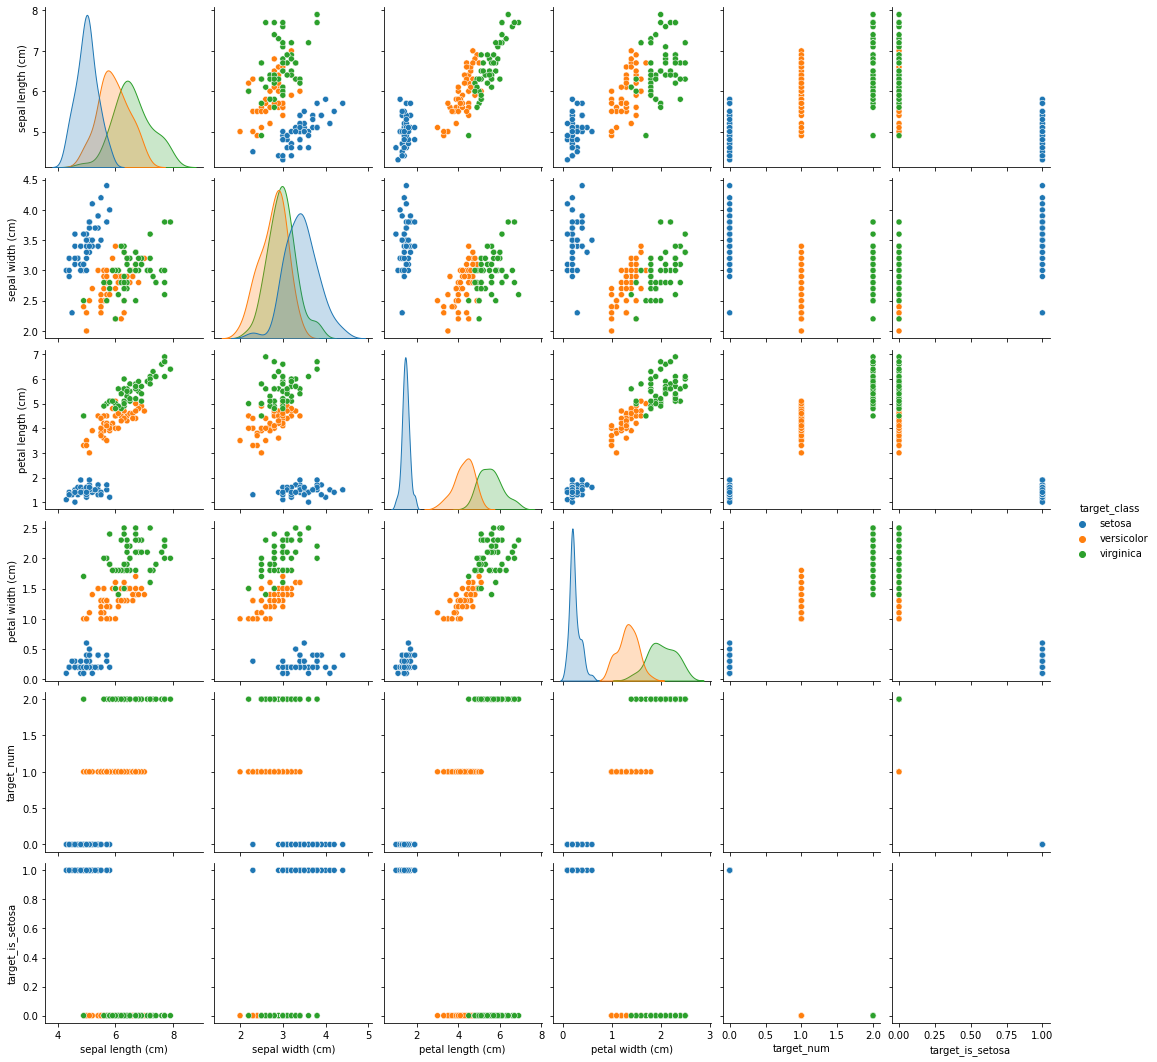

In [9]:
sns.pairplot(iris_df, hue="target_class")

## Model selection
Model selection methods: Train test split / Cross Validation / hyper-parameters tuning / etc


Vediamo ora la prima fase: split dei dati fra train e test set.

In [10]:
from sklearn.model_selection import train_test_split

Creazione di:
- X (features: input per il modello)
- y (variabile target per classificazione multi-classe) 
- y_binary (variabile target per classificazione binaria)

In [11]:
X = iris_df[iris.feature_names]
y = iris_df["target_class"]
y_binary = iris_df["target_is_setosa"]

In [12]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target_class, dtype: object

In [14]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_class, dtype: int64

In [15]:
y_binary.value_counts() # classi sbilanciate!!

0    100
1     50
Name: target_is_setosa, dtype: int64

#### suddivisione in train dataset e test dataset per classificazione binaria
Attenzione: le nostre classi sono sbilanciate

In [16]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary, = train_test_split(X, y_binary, test_size=0.3, shuffle=True, random_state=42) 

In [17]:
X_train_binary.shape, X_test_binary.shape, y_train_binary.shape, y_test_binary.shape

((105, 4), (45, 4), (105,), (45,))

In [18]:
y_binary.value_counts() / len(y_binary)

0    0.666667
1    0.333333
Name: target_is_setosa, dtype: float64

In [19]:
y_train_binary.value_counts() / len(y_train_binary)

0    0.704762
1    0.295238
Name: target_is_setosa, dtype: float64

In [20]:
y_test_binary.value_counts() / len(y_test_binary)

0    0.577778
1    0.422222
Name: target_is_setosa, dtype: float64

La percentuale di positivi nel train e test non viene mantenuta.

Sia il Train che il Test dataset devono essere il più rappresentativi possibile dei dati completi originali, quindi utilizziamo una suddivisione *stratified*.
Soprattuto quando il dataset è sbilanciato e non troppo grande (come in questo caso), è consigliato usare il parametro **stratify**.

In [21]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary, = train_test_split(X, y_binary, test_size=0.3, shuffle=True, stratify=y_binary, random_state=42) 

In [22]:
X_train_binary.shape, X_test_binary.shape, y_train_binary.shape, y_test_binary.shape

((105, 4), (45, 4), (105,), (45,))

In [23]:
y_train_binary.value_counts() / len(y_train_binary)

0    0.666667
1    0.333333
Name: target_is_setosa, dtype: float64

In [24]:
y_test_binary.value_counts() / len(y_test_binary)

0    0.666667
1    0.333333
Name: target_is_setosa, dtype: float64

#### suddivisione in train dataset e test dataset per classificazione multiclasse

In [25]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42) 

In [26]:
X.shape, y.shape

((150, 4), (150,))

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [28]:
y_train.value_counts()

versicolor    35
setosa        35
virginica     35
Name: target_class, dtype: int64

In [29]:
y_test.value_counts()

virginica     15
versicolor    15
setosa        15
Name: target_class, dtype: int64

## Preprocessing (Transformers)
Includes scaling, centering, normalization, binarization methods.

Durante la fase di preprocessing è possibile trasformare sia le features in input (X) che la variabile target. Vediamo qualche esempio.

In [30]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder # transformers for labels (y)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # transformers for features (X)

Trasformiamo la label multiclasse in numerica

In [31]:
le = LabelEncoder()

y_train_le = pd.Series(le.fit_transform(y_train), index=y_train.index)

y_test_le = pd.Series(le.transform(y_test), index=y_test.index)
y_train_le.shape, y_test_le.shape

((105,), (45,))

In [32]:
y_train[:10]

98     versicolor
68     versicolor
19         setosa
143     virginica
99     versicolor
145     virginica
9          setosa
46         setosa
8          setosa
102     virginica
Name: target_class, dtype: object

In [33]:
y_train_le[:10]

98     1
68     1
19     0
143    2
99     1
145    2
9      0
46     0
8      0
102    2
dtype: int32

In [34]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [35]:
le.inverse_transform([0,1,2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Trasformiamo le features in input (X) standardizzandole: 
- rimuovendo la media
- scalandole su 1 unità di varianza

La standardizzazione applicata è quello dello z-score.

```
z = (x - u) / s
```
dove:
- *u* è la madia degli esempi di training
- *s* è la deviazione standard degli esempi di training


Questa è una trasformazione richeista da molti algoritmi di Machine Learning (*estimators*) che altrimenti funzionerebbero in modo non ottimale. 
Per es. le SVM o alcuni modelli lineari potrebbero dare importanza maggiore a features con magnitudo maggiore, trascurando il potere predittivo delle altre.

In [36]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_ss = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train.shape, X_train_ss.shape, X_test.shape, X_test_ss.shape

((105, 4), (105, 4), (45, 4), (45, 4))

In [37]:
X_train[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
19,5.1,3.8,1.5,0.3
143,6.8,3.2,5.9,2.3
99,5.7,2.8,4.1,1.3
145,6.7,3.0,5.2,2.3
9,4.9,3.1,1.5,0.1
46,5.1,3.8,1.6,0.2
8,4.4,2.9,1.4,0.2
102,7.1,3.0,5.9,2.1


In [38]:
X_train_ss[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,-0.900459,-1.220248,-0.441986,-0.136610
68,0.380366,-1.879558,0.402829,0.380294
19,-0.900459,1.636764,-1.286801,-1.170419
143,1.078998,0.318143,1.191323,1.414103
99,-0.201827,-0.560937,0.177545,0.121842
145,0.962559,-0.121397,0.797076,1.414103
9,-1.133336,0.098373,-1.286801,-1.428871
46,-0.900459,1.636764,-1.230480,-1.299645
8,-1.715529,-0.341167,-1.343122,-1.299645
102,1.428314,-0.121397,1.191323,1.155651


Gli z-scores vengono calcolati indipendentemente per ogni feature, possiamo verificarlo osservando le *u* e le *s* di ogni feature nel nostro transformer.

In [39]:
ss.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [40]:
ss.mean_

array([5.87333333, 3.0552381 , 3.7847619 , 1.20571429])

In [41]:
ss.scale_

array([0.85882164, 0.45502087, 1.77553646, 0.77383751])

Non lo vedremo negli esempi, ma un'altra tecnica molto usata è quella del [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

Non esiste una regola a priori che ci dica quando è meglio usare una tecnica oppure un'altra.
In linea di massima possiamo dire che se la distribuzione è "a campana" è meglio usare StandardScaler, altrimenti MinMaxScaler.

## Estimators

Vediamo ora alcuni esempi di classificatori per capire come funzionano gli estimators.

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

definiamo un Decision Tree per una classificazione binaria

In [43]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf

DecisionTreeClassifier(max_depth=2, random_state=42)

addestramento

In [44]:
%%time
clf.fit(X_train_binary, y_train_binary)

Wall time: 5 ms


DecisionTreeClassifier(max_depth=2, random_state=42)

In [45]:
# previsione sul test dataset
y_pred_binary = clf.predict(X_test_binary)
X_test_binary.shape, y_pred_binary.shape

((45, 4), (45,))

In [46]:
y_pred_binary[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [47]:
y_test_binary[:10].values

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

visualizzazione del modello addestrato

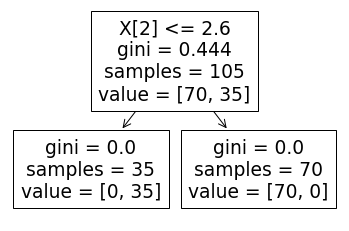

In [48]:
from matplotlib import pyplot as plt
plot_tree(clf)
plt.show()

In [49]:
X.columns[2]

'petal length (cm)'

osserviamo che viene creato un albero binario che possiamo convertire nella regola:
- se *lunghezza petalo = 2.6* allora è *iris-setosa* altrimenti *no*

#### vediamo ora un classificatore multiclasse
Utilizzando un meta-classificatore che ci permetta di fare un apprendimento multi-classe (con classi esclusive: ogni elemento può appartenere ad una sola classe).

Questo approccio, chiamato One-vs-Rest (o One-vs-All) consiste nel fare training di 1 classificatore binario per ogni classe usando come variabile target una classe contro tutte le altre - o, in altro modo, la presenza o assenza di tale classe.

Esattamente quello che abbiamo fatto con il DecisionTree sulla classe *iris-setosa* replicato per tutte le classi del dataset.

In [50]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier # estimator

In questo caso useremo una SVM.
Come anticipato prima questo algoritmo è sensibile ai dati di grande magnitudo, quindi andremo ad utilizzare le variabili precedentemente standardizzate.

In [51]:
ovr_clf = OneVsRestClassifier(estimator=SVC(random_state=42))

In [52]:
display(X_train_ss.head())
display(y_train_le.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,-0.900459,-1.220248,-0.441986,-0.136610
68,0.380366,-1.879558,0.402829,0.380294
19,-0.900459,1.636764,-1.286801,-1.170419
143,1.078998,0.318143,1.191323,1.414103
99,-0.201827,-0.560937,0.177545,0.121842


98     1
68     1
19     0
143    2
99     1
dtype: int32

addestramento

In [53]:
%%time
ovr_clf.fit(X_train_ss, y_train_le)

Wall time: 11 ms


OneVsRestClassifier(estimator=SVC(random_state=42))

previsione sul test dataset

In [54]:
y_pred_ovr = ovr_clf.predict(X_test_ss)
y_test_le.shape, y_pred_ovr.shape

((45,), (45,))

In [55]:
y_test_le[:10].values

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2])

In [56]:
y_pred_ovr[:10]

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2])